In [1]:
from pycalphad import Database, Model, variables as v

In [2]:
from pycalphad import equilibrium
import numpy as np

TDB = """
 ELEMENT A    GRAPHITE                   12.011     1054.0      5.7423 !
 ELEMENT B   BCC_A2                     55.847     4489.0     27.2797 !
 TYPE_DEFINITION % SEQ * !
 PHASE TEST % 1 1 !
 CONSTITUENT TEST : A,B: !
"""

my_phases_rose = ['TEST']
comps = ['A', 'B']#, 'LI', 'BE', 'B', 'C', 'N', 'O', 'F']
comps = sorted(comps)
conds = dict({v.T: 1000, v.P: 101325, v.N: 1})
#for comp in comps[1:]:
#    conds[v.X(comp)] = 1.0/float(len(comps))
#conds[v.MU('B')] = -1855.3270574019966
conds[v.X('A')] = 0.2
dbf = Database(TDB)
eqx = equilibrium(Database(TDB), comps, my_phases_rose, conds, calc_opts={'pdens': 10}, verbose=True)

Components: A B
Phases: build_callables [N, P, T]
TEST 
[done]
build_callables [N, P, T]
[[ 0.2  0.8]]
('Redundant phase:', CompositionSet(TEST, [ 0.18104292  0.81895708], NP=0.5396454273187647, GM=-3932.5193474781304))
Removing CompositionSet(TEST, [ 0.18104292  0.81895708], NP=nan, GM=-3932.5193474781304)
('cur_conds', OrderedDict([('N', array(1.0)), ('P', array(101325.0)), ('T', array(1000.0)), ('X_A', array(0.2))]))
('fixed_statevars', [('N', array(1.0)), ('P', array(101325.0)), ('T', array(1000.0))])
(array([], dtype=int32), array([], dtype=float64))
('prob.x0', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         2.22222222e-01,   7.77777778e-01,   1.00000000e+00]))
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         2.22222222e-01,   7.77777778e-01,   1.00000000e+00]))
('total_obj', -4404.2421920706565)
('x_in', array([  1.00000000e+00,   1.01325000e+05,   1.00000000e+03,
         2.00000000e-01,   8.00000000e-01,   1.00000000e+00]))
(

In [3]:
eqx.MU

<xarray.DataArray 'MU' (N: 1, P: 1, T: 1, X_A: 1, component: 2)>
array([[[[[-13381.671523,  -1855.327057]]]]])
Coordinates:
  * N          (N) float64 1.0
  * P          (P) float64 1.013e+05
  * T          (T) float64 1e+03
  * X_A        (X_A) float64 0.2
  * component  (component) <U1 'A' 'B'

In [4]:
eqx.X

<xarray.DataArray 'X' (N: 1, P: 1, T: 1, X_A: 1, vertex: 3, component: 2)>
array([[[[[[ 0.2,  0.8],
           [ nan,  nan],
           [ nan,  nan]]]]]])
Coordinates:
  * N          (N) float64 1.0
  * P          (P) float64 1.013e+05
  * T          (T) float64 1e+03
  * X_A        (X_A) float64 0.2
  * vertex     (vertex) int64 0 1 2
  * component  (component) <U1 'A' 'B'

In [5]:
eqx.Y

<xarray.DataArray 'Y' (N: 1, P: 1, T: 1, X_A: 1, vertex: 3, internal_dof: 2)>
array([[[[[[ 0.2,  0.8],
           [ nan,  nan],
           [ nan,  nan]]]]]])
Coordinates:
  * N        (N) float64 1.0
  * P        (P) float64 1.013e+05
  * T        (T) float64 1e+03
  * X_A      (X_A) float64 0.2
  * vertex   (vertex) int64 0 1 2
Dimensions without coordinates: internal_dof

0.555777888833


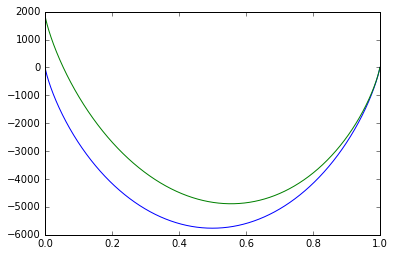

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(1e-9,1-1e-9,2000)
y = 1-x
gm = 8314.5*(np.log(x)*x + (y)*np.log(y))
ac = 0.8
mu = 8314.5*np.log(0.8)

trans_func = gm - mu*y
print(x[np.argmin(trans_func)])
plt.plot(x,gm, label='GM')
plt.plot(x, trans_func, label='L')

(-100, 100)

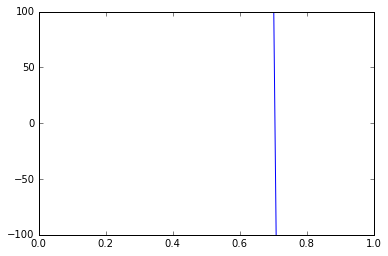

In [7]:
plt.plot(x,8314.5*(1+np.log(y)) - mu)
plt.ylim((-100,100))

In [8]:
ya = 0.2
yb = 0.8
A = np.array([[1,0,0.2],[0,1,0.8],[1,1,0]])
mu = np.dot(np.linalg.inv(A.T), 8314.5*np.array([np.log(0.2) + 1, np.log(0.8) + 1, 0.2*np.log(0.2) + 0.8*np.log(0.8)]))

In [1]:
from pycalphad import Model, Database, variables as v
from pycalphad.codegen.sympydiff_utils import build_functions
from pycalphad.core.constraints import build_constraints
from sympy import ImmutableMatrix, Symbol

dbf = Database('AlSb.tdb')
mod = Model(dbf, ['AL', 'SB'], 'LIQUID')
conds = {v.T: 300, v.P: 101325, v.X('AL'): 0.3}
int_cons = mod.get_internal_constraints()
mp_cons = mod.get_multiphase_constraints(conds)
cons = ImmutableMatrix((int_cons, mp_cons))
func, grad = build_functions(cons * cons.T, mod.variables + [Symbol('NP')], include_obj=True, include_grad=True)

In [2]:
import numpy as np
func.kernel(np.array([[300, 0.5, 0., 0.5, 1]]), np.array([]))
grad.kernel(np.array([[300, 0.5, 0., 0.5, 1]]), np.array([]))

CodeWrapError: Error while executing command: /home/rotis/anaconda/envs/calphadpy3/bin/python /tmp/pycalphad-up5za7ja/setup.py build_ext --build-lib /tmp/pycalphad-up5za7ja. Command output is:
running build_ext
cythoning /tmp/pycalphad-up5za7ja/wrapper_module_e6ad5eed_4253_4003_93f2_06ee78c981b5.pyx to /tmp/pycalphad-up5za7ja/wrapper_module_e6ad5eed_4253_4003_93f2_06ee78c981b5.c
building 'wrapper_module_e6ad5eed_4253_4003_93f2_06ee78c981b5' extension
creating build/temp.linux-x86_64-3.5/tmp/pycalphad-up5za7ja
gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/rotis/anaconda/envs/calphadpy3/lib/python3.5/site-packages/numpy/core/include -I/home/rotis/anaconda/envs/calphadpy3/include/python3.5m -c /tmp/pycalphad-up5za7ja/wrapper_module_e6ad5eed_4253_4003_93f2_06ee78c981b5.c -o build/temp.linux-x86_64-3.5/tmp/pycalphad-up5za7ja/wrapper_module_e6ad5eed_4253_4003_93f2_06ee78c981b5.o -std=c99
In file included from /home/rotis/anaconda/envs/calphadpy3/lib/python3.5/site-packages/numpy/core/include/numpy/ndarraytypes.h:1777,
                 from /home/rotis/anaconda/envs/calphadpy3/lib/python3.5/site-packages/numpy/core/include/numpy/ndarrayobject.h:18,
                 from /home/rotis/anaconda/envs/calphadpy3/lib/python3.5/site-packages/numpy/core/include/numpy/arrayobject.h:4,
                 from /tmp/pycalphad-up5za7ja/wrapper_module_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:406:
/home/rotis/anaconda/envs/calphadpy3/lib/python3.5/site-packages/numpy/core/include/numpy/npy_1_7_deprecated_api.h:15:2: warning: #warning "Using deprecated NumPy API, disable it by " "#defining NPY_NO_DEPRECATED_API NPY_1_7_API_VERSION" [-Wcpp]
 #warning "Using deprecated NumPy API, disable it by " \
  ^~~~~~~
gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -fPIC -I/home/rotis/anaconda/envs/calphadpy3/lib/python3.5/site-packages/numpy/core/include -I/home/rotis/anaconda/envs/calphadpy3/include/python3.5m -c /tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c -o build/temp.linux-x86_64-3.5/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.o -std=c99
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c: In function ‘autofunc’:
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:15:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:13:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:17:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:15:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:19:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:17:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:21:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:19:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:23:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:21:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:25:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:23:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:27:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:25:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:29:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:27:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:31:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:29:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:33:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:31:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:35:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:33:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:37:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:35:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:39:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:37:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:41:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:39:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:43:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:41:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:45:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:43:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:47:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:45:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:49:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:47:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:51:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:49:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:53:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:51:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:55:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:53:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:57:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:55:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:59:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:57:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:61:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:59:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:63:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:61:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:65:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:63:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:67:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:65:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:69:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:67:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:71:11: error: redeclaration of ‘autofunc_result’ with no linkage
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:69:11: note: previous declaration of ‘autofunc_result’ was here
    double autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:73:11: warning: ‘return’ with a value, in function returning void
    return autofunc_result;
           ^~~~~~~~~~~~~~~
/tmp/pycalphad-up5za7ja/wrapped_code_e6ad5eed_4253_4003_93f2_06ee78c981b5.c:11:6: note: declared here
 void autofunc(double *inp, double *params) {
      ^~~~~~~~
/home/rotis/anaconda/envs/calphadpy3/lib/python3.5/site-packages/Cython/Distutils/old_build_ext.py:30: UserWarning: Cython.Distutils.old_build_ext does not properly handle dependencies and is deprecated.
  "Cython.Distutils.old_build_ext does not properly handle dependencies "
error: command 'gcc' failed with exit status 1


In [13]:
cons

Matrix([
[                                                 LIQUID0AL + LIQUID0AL1SB1 + LIQUID0SB - 1],
[NP*(1.0*LIQUID0AL + 1.0*LIQUID0AL1SB1)/(1.0*LIQUID0AL + 2.0*LIQUID0AL1SB1 + 1.0*LIQUID0SB)]])